In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class switch:

	def __init__(self, variable, comparator=None, strict=False):
		self.variable = variable
		self.matched = False
		self.matching = False
		if comparator:
			self.comparator = comparator
		else:
			self.comparator = lambda x, y: x == y
		self.strict = strict

	def __enter__(self):
		return self

	def __exit__(self, exc_type, exc_val, exc_tb):
		pass

	def case(self, expr, break_=False):
		if self.strict:
			if self.matched:
				return False
		if self.matching or self.comparator(self.variable, expr):
			if not break_:
				self.matching = True
			else:
				self.matched = True
				self.matching = False
			return True
		else:
			return False

	def default(self):
		return not self.matched and not self.matching

In [4]:
datoscop=pd.read_csv('https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv') #Lectura de datos


In [12]:
X1=datoscop["X"]
X2=datoscop["W"]

Y1=datoscop["b"]

sel2=[]
sel1=[]
sel22=[]
sel11=[]
n=100
for i in range (n):
  if Y1[i]==1:
    sel1.append(X1[i])
    sel11.append(X2[i])
  else:
    sel2.append(X1[i])
    sel22.append(X2[i])

In [ ]:
def f(x22):        #definicion_de_recta_clasificadora
  return 0.3-x22  

 
x22=np.arange(0,1,0.1)
y22= f(x22)


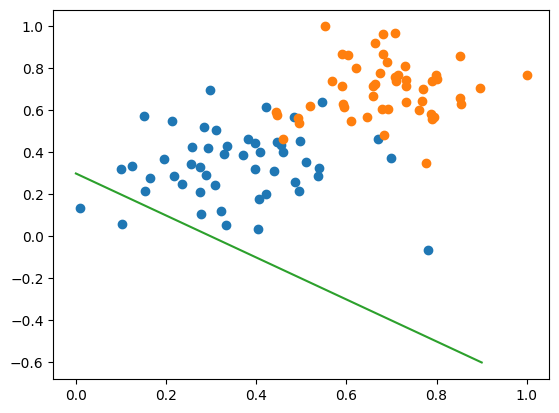

In [ ]:
fig, ax = plt.subplots()   # Gráfica_con_valores_iniciales (pesos y bias iniciales)
plt.plot(sel1,sel11,'o'
plt.plot(sel2,sel22,'o')
ax.plot(x22,y22)

In [ ]:
# entrenamiento_perceptron
peso1=1
peso2=1
bias=-0.3

alpha=0.003
betha=0.001
gamma=0.002


x22=np.arange(0,1,0.1)

def clasificador(peso1,peso2,bias):
  return (-bias-(peso2*x22))/peso1

solucion=[]

for epocas in range(10):
  with switch(epocas) as ep:
    if ep.case(2):
      salida1=clasificador(peso1,peso2,bias)
    if ep.case(5):
      salida2=clasificador(peso1,peso2,bias)
    if ep.case(7):
      salida3=clasificador(peso1,peso2,bias)
    if ep.case(9):
      salida4=clasificador(peso1,peso2,bias)
    
  
  
  for i in range(n):
   solucion=(X1[i]*peso1)+(X2[i]*peso2)+bias
   if solucion <0:
    if Y1[i]==0:
       peso1=peso1+alpha
       peso2=peso2+gamma
       bias=bias+betha
   else:
     if Y1[i]==1:
       peso1=peso1-alpha
       peso2=peso2-gamma
       bias=bias-betha

In [ ]:
x22=np.arange(0,1,0.1)

def clasificador(peso1,peso2,bias):
  return (-bias-(peso2*x22))/peso1

In [ ]:
print(peso1)
print(peso2)
print(bias)

salida=clasificador(peso1,peso2,bias)

0.6499999999999997
0.6499999999999997
-0.6500000000000002


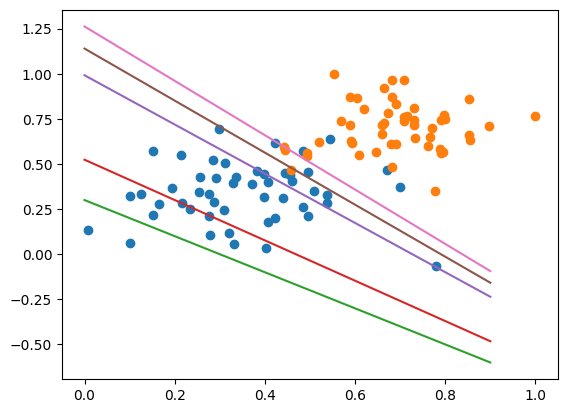

In [ ]:
fig, ax = plt.subplots()
plt.plot(sel1,sel11,'o')
plt.plot(sel2,sel22,'o')
ax.plot(x22,y22)
ax.plot(x22,salida1)
ax.plot(x22,salida2)
ax.plot(x22,salida3)
ax.plot(x22,salida4)
